## Derivation of propagation speed of a spike propagating through a 1D chain of excitatory neurons, coupled to recurrent inhibition

### Overview
The aim is to solve exactly a simple network in which excitatory cells are coupled in a 1-D manner and a single inhibitory cell is recurrently coupled to all excitatory cells.

### Single cell model

Consider a 1-D chain of bursting neurons coupled to a single inhibitory cell. The governing equations for the dynamics of each individual cell are:

\begin{equation*}
\dot{V}(t) = -\frac{V(t)}{\tau_m} + \frac{I(t)}{C}
\label{eq:single_membrane} \tag{1}
\end{equation*}

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $I(t)$ is the external current, and $C$ is the membrane capacitance.

If neuron 1 is connected to neuron 2 by directional weight $w$, then the spike from 1 elicits current $I_{s}(t)$ in cell 2, where $I_{s}$ is given by:

\begin{equation*}
I_{s}(t) = \frac{t}{\tau_{\alpha}} e^{-t/\tau_{\alpha}} \Theta (t)
\label{eq:single_spike_current} \tag{2}
\end{equation*}

where $\Theta$ is the Heaviside function.

### Lemma: consistent firing

If neuron 1 fires at a consistent rate $f$, such that $1/f$ is proportional to or less the $\tau_{\alpha}$, the current in cell 2 will saturate at:

$$ I_{steady} = w \tau_{\alpha} f $$

Further, the following equation is a reasonable approximation of the current as the cell is driven:

\begin{equation*}
I_{rise}(t) = w \tau_{\alpha} f \left(1 - e^{-t/\tau_{\alpha}}\right)
\label{eq:current_approx} \tag{3}
\end{equation*}

### A first step: excitatory 1-D chain

We begin by considering a 1-D excitatory chain, driving the first layer at frequency $f_{in}$ for a duration $t_{b}$.

We take (3) to reasonable approximate the current a cell receives up until time $t_{b}$, at which point the decaying current is described by:

\begin{equation*}
I_{decay}(t) = w \tau_{\alpha} f \left(1 - e^{-t_b/\tau_{\alpha}}\right) e^{-(t-t_b)/\tau_{\alpha}}
\label{eq:current_approx} \tag{4}
\end{equation*}

for $ t \gt t_b $.

If we consider the burst to be short compared to the leak membrane time constant, then the voltage across the cell is just the current integrated:

\begin{equation*}
V(t) = \frac{1}{C}\int_{-\inf}^{t} I(t') dt'
\label{eq:current_approx} \tag{5}
\end{equation*}

$$
V(t) = \begin{cases} 
    \frac{w \tau_{\alpha} f}{C} \left(t + \tau_{\alpha} (e^{-t/\tau_{\alpha}} - 1)\right) & t \leq t_{b} \\
    \frac{w \tau_{\alpha} f}{C} \left(t_{b} + \tau_{\alpha} (e^{-t_{b}/\tau_{\alpha}} - 1) + \tau_{\alpha} e^{-(t - t_{b})/\tau_{\alpha}}\right)  & t \gt t_{b} \\
\end{cases}
$$

We compute the new burst duration as the time elapsed between the first spike produced and the last spike produced. The former is:

$$ V_{th} = \frac{w \tau_{\alpha} f}{C} \left(t^* + \tau_{\alpha} (e^{-t^*/\tau_{\alpha}} - 1)\right) $$

The latter is:

$$ n V_{th} = \frac{w \tau_{\alpha} f}{C} \left(t_{b} + \tau_{\alpha} (e^{-t_{b}/\tau_{\alpha}} - 1) + \tau_{\alpha} e^{-(t^{**} - t_{b})/\tau_{\alpha}}\right) $$

The frequency of emitted spikes is approximated by:
    
$$ f_{out}(t)  = \frac{1}{V_{th}}\frac{d}{dt} V(t)
               \approx \frac{w \tau_{\alpha} f}{V_{th} C}
$$

### Chain model

Assume each excitatory cell in the chain is coupled to its successor with weight $W_{ee}$ and that each cell is coupled to the I cell with weight $W_{ei}$. Assume the I cell is coupled to all cells in the chain with weight $W_{ie}$.

If activity in the chain has reached steady (propagating state), then the average drive to the I cell is:

$$ I_{ei} = W_{ei} \tau_{\alpha} p $$

where $p$ is the number of excitatory cells firing per second (or the propagation speed).

To calculate the average firing rate of the I cell, we begin with the equation for the voltage of a current-coupled neuron driven by a constant current:

$$ V(t) = \frac{1}{C_i}\int_{0}^{t} e^{-(t-t')/\tau_i} I_{ei} dt'$$

\begin{equation*}
V_{i}^{th} = \frac{I_{ei}}{C_i} \tau_i \left(1 - e^{-t/\tau_i}\right)
\label{eq:steady_state_voltage} \tag{3}
\end{equation*}

This implies the average time to fire is:

$$ t^*_i = -\tau_i \log \left( 1 - \frac{V_{i}^{th} C_i}{I_{ei} \tau_i} \right) $$

This implies firing rate $f_i$:

$$ f_i = \frac{-1}{\tau_i \log \left( 1 - \frac{V_{i}^{th} C_i}{W_{ei} \tau_{\alpha} e p \tau_i} \right)} $$

Prior to the arrival of the excitatory spike pulse, a given excitatory neuron has been driven for a long time by inhibitory spikes of frequency $f_{i}$, leading to a steady state voltage. We reuse equation (3), but take time to infinity, yielding:

$$ V_{e} = \frac{I_{ie} \tau_i}{C_e} = \frac{W_{ie} \tau_{\alpha} e f_i \tau_i}{C_e}$$

Now we turn to calculating the time-to-fire of a bursting cells that is just beginning to receive input from its predecessor. We assume steady state, so this cell has been receiving constant inhibitory spikes of frequency $f_i$ for a long time. Therefore, we have:

$$ V_{e}(t) = \frac{W_{ie} \tau_{\alpha} e f_i \tau_i}{C_e} + \frac{1}{C_e}\int_0^{t} e^{-(t-t')/\tau_e} I_{ee}(t') dt'$$

\begin{equation*}
V_{e}^{th} = \frac{W_{ie} \tau_{\alpha} e f_i \tau_i}{C_e} + \frac{1}{C_e}\int_0^{t^*_e} e^{-(t-t')/\tau_e} I_{ee}(t') dt'
\label{eq:steady_state_voltage} \tag{4}
\end{equation*}

If we define $I_{ee}(t)$ as:

$$ I_{ee}(t) = W_{ee} \frac{e}{\tau_{\alpha}} t e^{-t/\tau_{\alpha}} \Theta (t) $$

Then the second term on the RHS, the convolution of the exponentially decaying kernel with the alpha function, is found to be:

\begin{equation*}
\frac{1}{C_e}\int_0^{t} e^{-(t-t')/\tau_e} I_{ee}(t') dt' = \frac{W_{ee} e}{C_e \tau_{\alpha}} \left( \frac{1}{m^2}(e^{-t/\tau_{e}} - e^{-t/\tau_{\alpha}}) - \frac{1}{m} t e^{-t/\tau_{\alpha}} \right)
\label{eq:steady_state_voltage} \tag{5}
\end{equation*}
where $m = \frac{1}{\tau_\alpha} - \frac{1}{\tau_e}$.

Using equations (4) and (5) and requiring that $t^*_e = \frac{1}{p}$ yields:

\begin{equation*}
V_{e}^{th} = \frac{W_{ie} \tau_{\alpha} e f_i \tau_i}{C_e} + \frac{W_{ee} e}{C_e \tau_{\alpha}} \left( \frac{1}{m^2}(e^{-1/(p \tau_{e})} - e^{-1/ (p \tau_{\alpha})}) - \frac{1}{m} t e^{-1/(p \tau_{\alpha})} \right)
\label{eq:steady_state_voltage} \tag{6}
\end{equation*}

Recalling that $f_i$ is a function of $p$, this equation may be solved numerically for $p$.

### Calculation of stable values of p for different values of recurrent inhibition

In [242]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
from scipy.optimize import fsolve
import scipy.io as sio
import pandas as pd
from tqdm import tqdm
import pickle
from collections import OrderedDict
import os
from scipy.ndimage.interpolation import shift
from functools import reduce
import time
from ntwk import LIFNtwkI
from aux import *
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [311]:
dt = 5e-5
tau_m_e = 4e-3
tau_m_i = 4e-3
tau_a = 1.6e-3
v_th_e = 20e-3
v_th_i = 20e-3
c_e = 1e-6
c_i = 1e-6
f_0 = 400

w_ee = 2.4e-4
w_ei = 0.5e-5
w_ie = -3e-5

In [312]:
# PARAMS
## NEURON AND NETWORK MODEL
M = Generic(
    # Excitatory membrane
    C_M_E=1e-6,  # membrane capacitance
    G_L_E=.1e-3,  # membrane leak conductance (T_M (s) = C_M (F/cm^2) / G_L (S/cm^2))
    E_L_E=-.07,  # membrane leak potential (V)
    V_TH_E=-.05,  # membrane spike threshold (V)
    T_R_E=0.5e-3,  # refractory period (s)
    T_R_I=0,
    E_R_E=-0.07, # reset voltage (V)
    
    # Inhibitory membrane
    #C_M_I=1e-6,
    #G_L_E=.1e-3, 
    #E_L_I=-.06,
    #V_TH_E=-.05,
    #T_R_I=.002,
    
    N_EXC=250,
    N_INH=1,
    
    # OTHER INPUTS
    SGM_N=0,  # noise level (A*sqrt(s))
    I_EXT_B=0,  # additional baseline current input
    
    W_E_E = w_ee,
    W_E_I = w_ei, #0.2e-5, #1e-5,
    W_I_E = w_ie,
    W_U_E = 0,
    W_U_I = 0, #1e-1,
    
    F_IN = 500,
    SIGMA_IN = 10e-3,
    
    F_B = 5e3,
    T_B = 15e-3,
)

t_r = M.T_R_E * np.ones((M.N_EXC + M.N_INH))
t_r[-1] = M.T_R_I

In [313]:
np.random.seed(2002)

def speed_test(M, buffer=200):
    w_r = np.block([
        [ M.W_E_E * np.diag(np.ones((M.N_EXC - 1)), k=-1), M.W_I_E * np.ones((M.N_EXC, M.N_INH)) ],
        [ M.W_E_I * np.ones((M.N_INH, M.N_EXC)), np.zeros((M.N_INH, M.N_INH)) ],
    ])

    w_u = np.block([
        [ np.array([M.W_U_E]), np.zeros((1)) ],
        [ np.zeros((M.N_EXC - 1, 2)) ],
        [ np.zeros((M.N_INH, 1)), M.W_U_I * np.ones((M.N_INH, 1)) ],
    ])

    i_b = np.zeros((M.N_EXC + M.N_INH), dtype=int)

    ntwk = LIFNtwkI(
        c_m = M.C_M_E,
        g_l = M.G_L_E,
        e_l = M.E_L_E,
        v_th = M.V_TH_E,
        v_r = M.E_R_E,
        t_r = t_r,
        w_r = w_r,
        w_u = w_u,
        i_b = i_b,
        f_b = M.F_B,
        t_b = M.T_B,
        t_a = tau_a,
    )

    S = Generic(RNG_SEED=0, T=0.62, DT=dt)
    t = np.arange(0, S.T, S.DT)

    spks_u = np.zeros((len(t), 2), dtype=int)
    
    clamp_input_spks = {}
    for i in np.arange(0, M.SIGMA_IN, 1 / m.F_IN):
        clamp_input_spks[i] = [0]

    rsp = ntwk.run(
        dt=S.DT,
        clamp=Generic(v={0: M.E_L_E * np.ones((M.N_EXC + M.N_INH))}, spk=clamp_input_spks),
        i_ext=np.zeros(len(t)),
        spks_u=spks_u)

    raster = np.stack([rsp.spks_t, rsp.spks_c])
    inh_raster = raster[:, raster[1, :] >= M.N_EXC]
    exc_raster = raster[:, raster[1, :] < M.N_EXC]
    
    parsed_exc_raster = exc_raster[:, exc_raster[0, :] >= buffer * S.DT]
    try:
        res = stats.linregress(parsed_exc_raster[0, :], parsed_exc_raster[1, :])
    except ValueError as e:
        print(e)
        return (np.nan, raster)
    
    return res.slope, raster

In [314]:
def get_equally_spaced_colors(n, cmap='autumn'):
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.linspace(0, 1, n))
    return [matplotlib.colors.rgb2hex(rgba) for rgba in colors]

all_colors = get_equally_spaced_colors(50)

In [315]:
data = []

w_ee_vals = [0.25e-3, 0.35e-3, 0.45e-3]
w_ei_vals = [0.25e-5, 0.5e-5, 0.75e-5]

for j, w_ee in enumerate(w_ee_vals):
    all_p = []
    rasters = []
    for i, w_ei in enumerate(w_ei_vals):
        m = copy(M)
        m.W_E_E = w_ee
        m.W_E_I = w_ei
        p_stable, parsed_raster = speed_test(m)
        all_p.append(p_stable)
        rasters.append(parsed_raster)
        print(f' p: {p_stable}')
    data.append((w_ee, w_ei_vals, all_p, rasters))

# plt.show()

 p: 223.63184464788282
 p: 225.3314850637073
 p: 336.21108847120036
 p: 209.5945304566197
 p: 218.0408825857529
 p: 676.5510331941389
 p: 210.4783406162085
 p: 210.32829581969094
 p: 210.638111726207


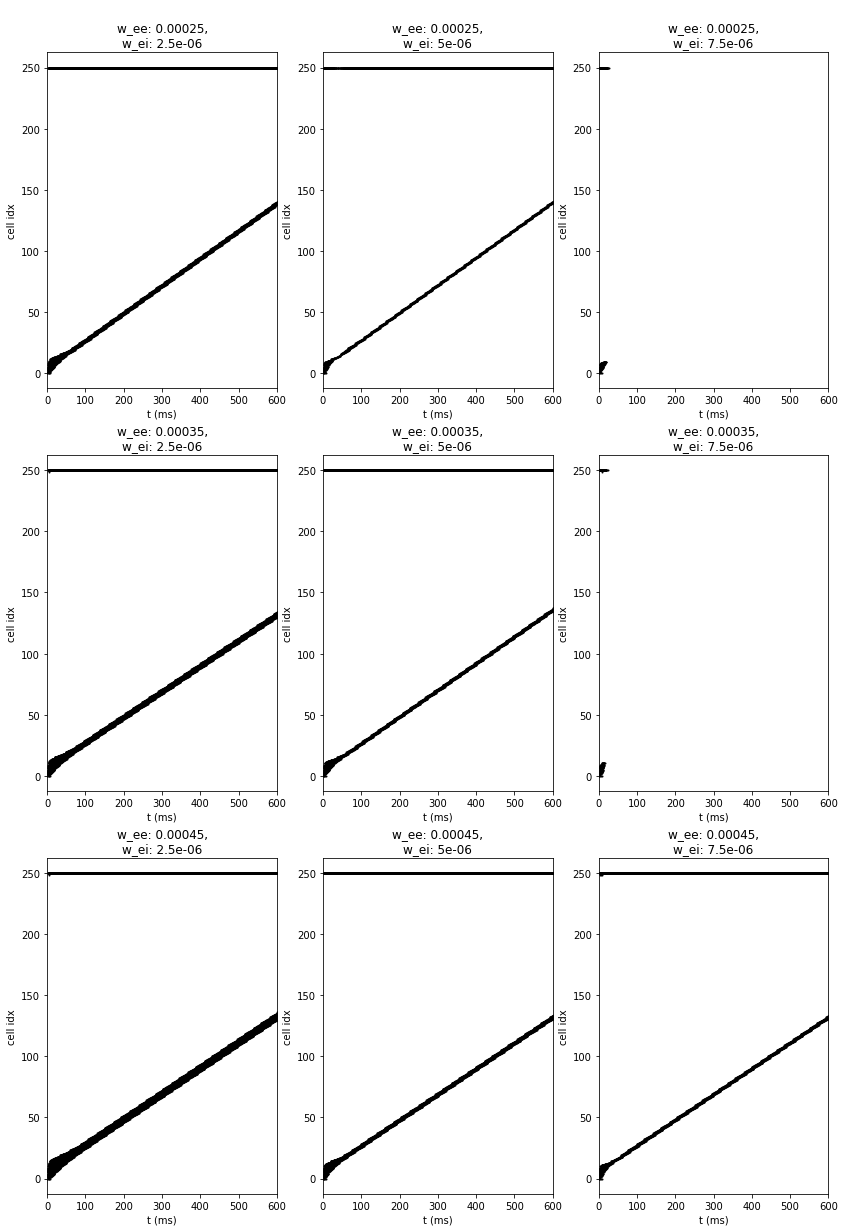

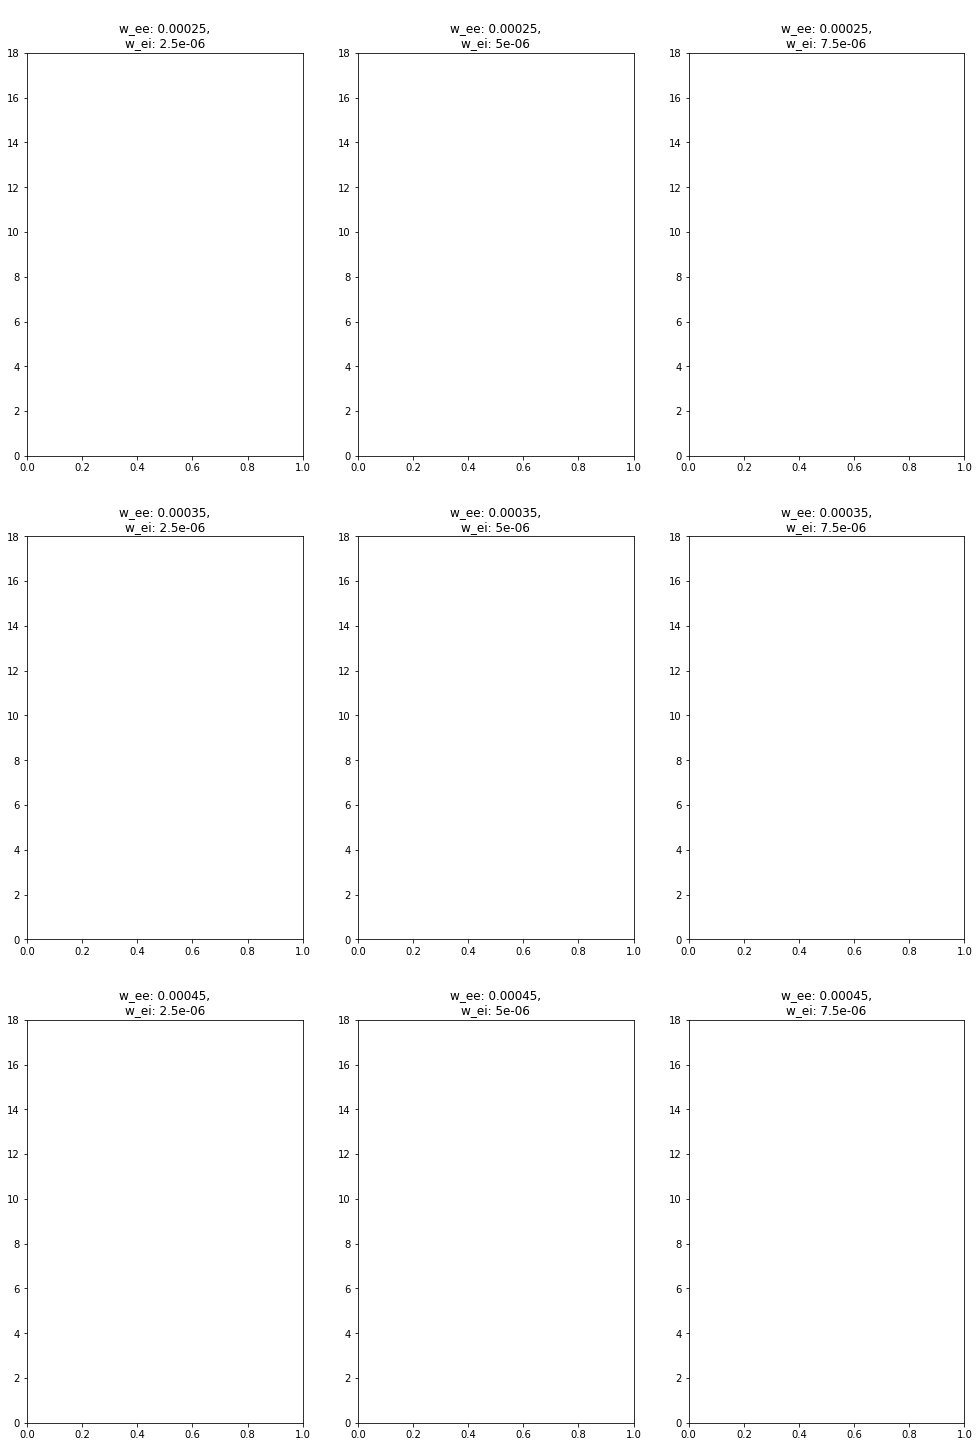

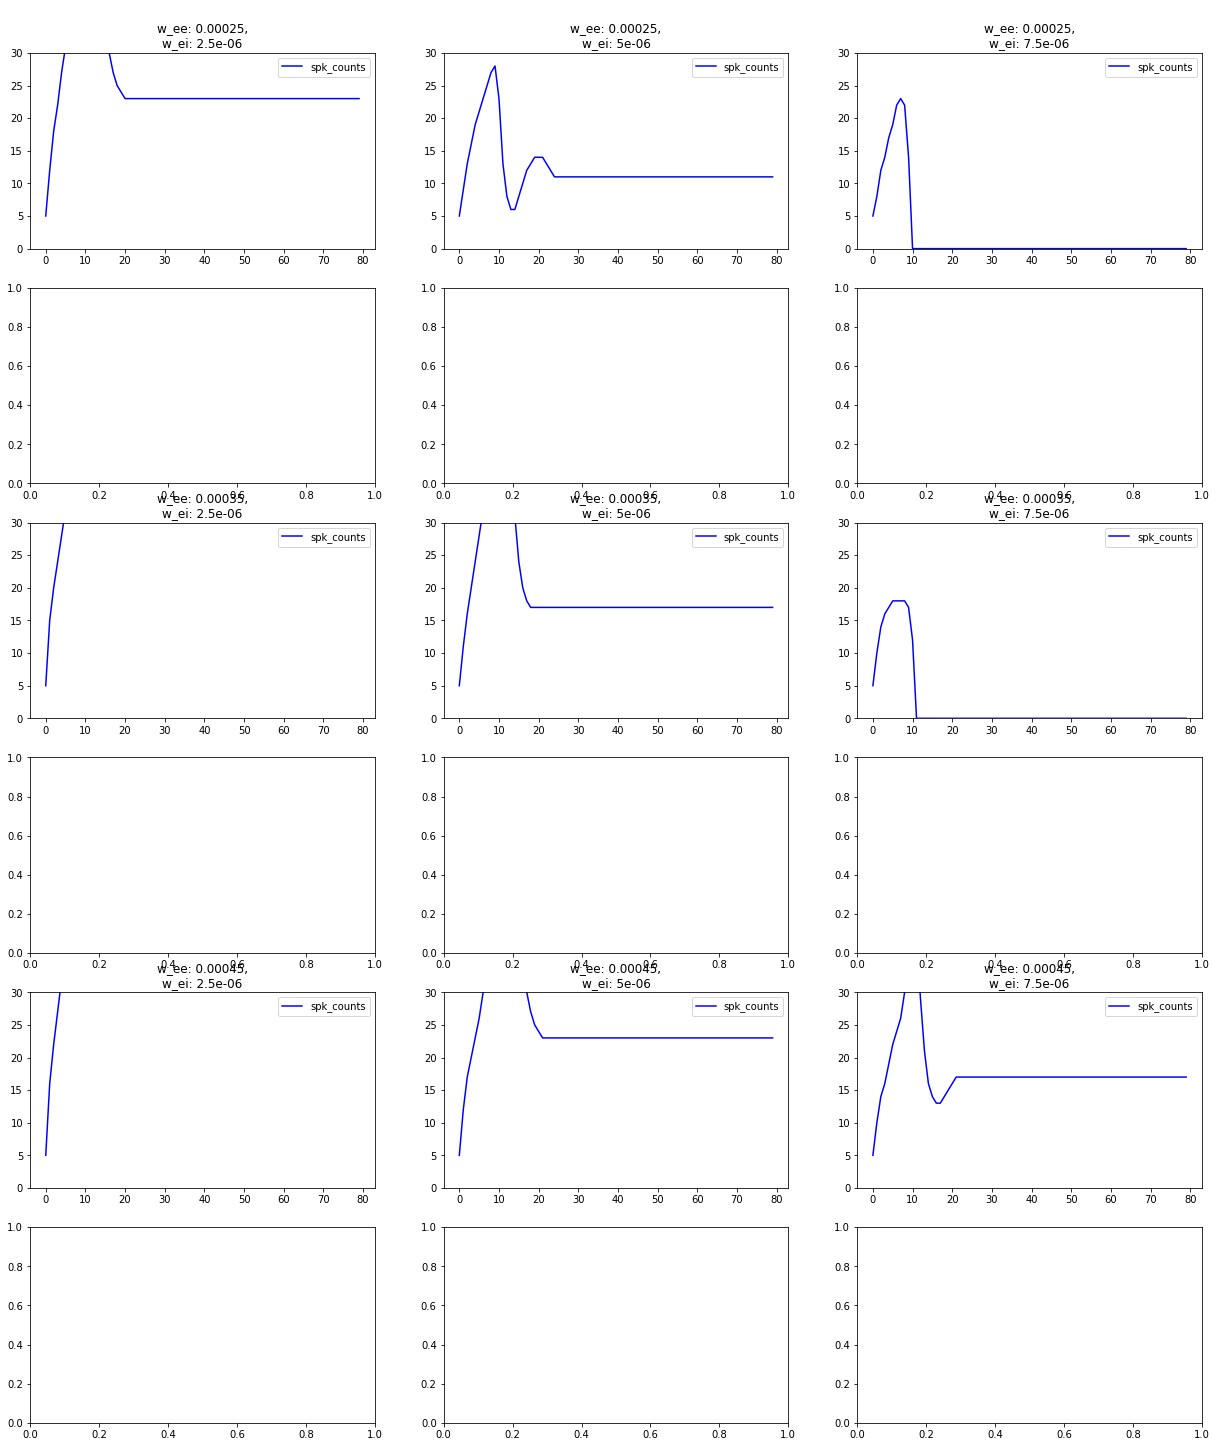

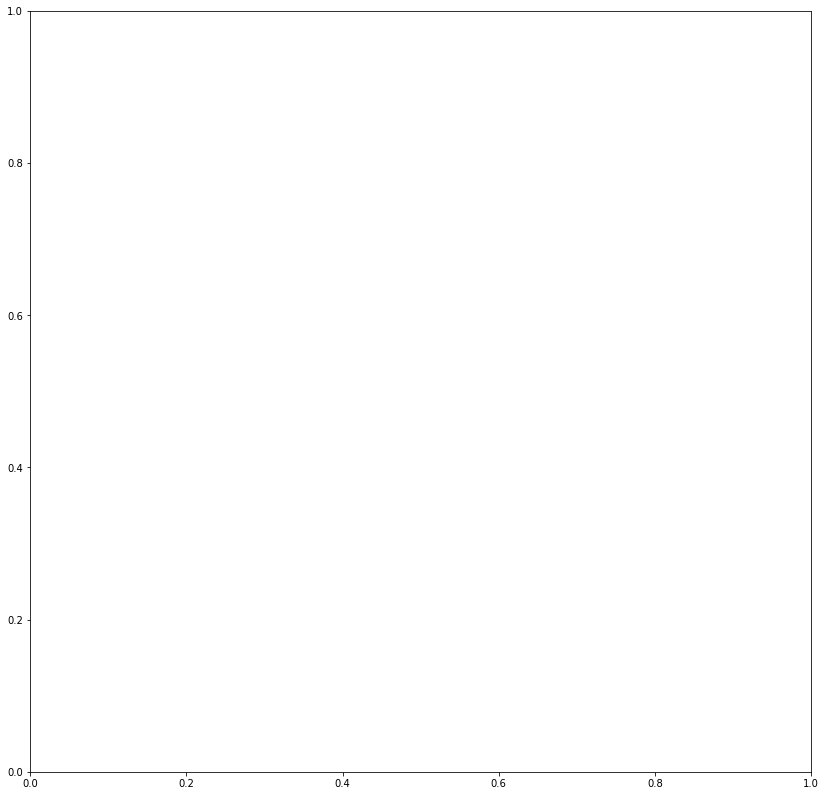

In [316]:
scale = 1.4
n = len(w_ee_vals)
n_2 = len(w_ei_vals)
fig, axs = plt.subplots(n, n_2, sharex=False, sharey=False, figsize=(10 * scale, 5 * n * scale))
colors = ['red', 'black', 'green', 'blue', 'purple', 'brown', 'pink']

fig_2, axs_2 = plt.subplots(n, n_2, sharex=False, sharey=False, figsize=(12 * scale, 6 * n * scale))
fig_3, axs_3 = plt.subplots(2 * n, n_2, sharex=False, sharey=False, figsize=(15 * scale, 6 * n * scale))
fig_4, axs_4 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(10 * scale, 10 * scale))

stable_spike_nums = []

for j, (w_ee, w_ei_vals, all_p, rasters) in enumerate(data):
    stable_spike_nums.append([])
    for k, raster in enumerate(rasters):
        trial_title = f'\nw_ee: {w_ee},\nw_ei: {w_ei_vals[k]}'
        axs[j, k].scatter(raster[0, :] * 1000, raster[1, :], c='black', s=1)
        axs[j, k].set_title(trial_title)
        spk_counts = []
        z_samples = [n for n in range(80)]
        for z in z_samples:
            n_spikes_for_z = np.sum(raster[1, :] == z)
            spk_counts.append(n_spikes_for_z)
        stable_spike_nums[j].append(spk_counts[-1])
        
        axs_2[j, k].set_title(trial_title)
        axs_2[j, k].set_ylim(0, 18)
        
        axs_3[2 * j, k].plot(z_samples[:len(spk_counts)], spk_counts, label='spk_counts', color='blue')
#         axs_3[2 * j + 1, k].plot(z_samples[:len(freq_maxs)], freq_maxs, label='freq avg', color='orange')
        axs_3[2 * j, k].set_title(trial_title)
        axs_3[2 * j, k].legend()
#         axs_3[2 * j + 1, k].legend()
        axs_3[2 * j, k].set_ylim(0, 30)
# #         axs_3[2 * j, k].set_xlim(0, 40)
#         axs_3[2 * j + 1, k].set_ylim(0, 17)
#         axs_3[2 * j + 1, k].set_xlim(0, 40)
        
#         u = np.diff(time_spreads)
#         v = np.diff(freq_maxs)
        
#         norm = np.sqrt(u**2 + v**2)
        
#         axs_4.quiver(time_spreads[:-1], freq_maxs[:-1], u/norm, v/norm,
#                      linewidths=0.1 * np.ones(len(freq_maxs)-1), color=all_colors[j * len(rasters) + k],
#                     scale=100, width=0.002)
#         axs_4.set_xlabel('Time spreads')
#         axs_4.set_ylabel('Freqs')
        
# axs[0].set_ylabel('p (1/s)')
# axs[0].set_xlabel(r'a_in')

for i in range(0, n):
    for k in range(0, n_2):
        axs[i, k].set_xlabel(r't (ms)')
        axs[i, k].set_ylabel('cell idx')
#         axs[i, k].set_ylim(-0.5, 150)
        axs[i, k].set_xlim(0, 600)


In [317]:
def t_star(n_out, tau_m, beta, w_r, n_in, c, v_th, tau_a, w_ee):
    t_stars = []
    for i, n in enumerate(n_in):
        t_stars.append(n_out[i] * tau_m * beta * w_r / (n_out[i] / n * c * v_th - tau_a * w_ee))
    return np.array(t_stars)

def n_in_n_out_relation(n_out, n_in, tau_m, beta, w_r, v_th, c, tau_a, w_ee, f_0):
    t_star = n_out * tau_m * beta * w_r / (n_out / n_in * c * v_th - tau_a * w_ee)
    return f_0 * (tau_a * (np.exp(-t_star / tau_a) - 1) + t_star) - n_in / n_out

In [321]:
def make_graph(all_w_r, w_ee, stable_spike_nums, bound=30):
    fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(8 * scale, 4 * scale))
    axs[0].set_xlim(0, bound)
    axs[0].set_ylim(0, bound)
    
    axs[0].set_xlabel('N spikes in')
    axs[0].set_ylabel('N spikes out')
    
    axs[1].set_xlim(0, bound)
#     axs[1].set_ylim(0, 1)
    
    axs[1].set_xlabel('N spikes in')
    axs[1].set_ylabel('Propagation speed')
    
    colors = ['red', 'blue', 'green']
    
    beta = 0.75e2
    
    for i, w_r in enumerate(all_w_r):
        def calc_n_out(n_in):
            n_out = []
            for n in n_in:
                f = partial(n_in_n_out_relation, n_in=n, tau_m=10e-3, beta=beta, w_r=w_r, v_th=v_th_e, c=c_e, tau_a=tau_a, w_ee=w_ee, f_0=f_0)
                sol = fsolve(f, n)
                n_out.append(sol[0])
            return n_out

        n_in = np.linspace(1, bound, bound)
        n_out = calc_n_out(n_in)

        axs[0].plot(n_in, n_in, '--', lw=0.5, color='black')
        axs[0].plot(n_in, n_out, lw=0.8, color=colors[i], label=f'w_r: {w_r}, w_ee: {w_ee}')
        axs[0].scatter(stable_spike_nums[i], stable_spike_nums[i], color=colors[i], s=50, marker='D')
        
        axs[1].plot(n_in, 1. / t_star(n_out, 10e-3, beta, w_r, n_in, c_e, v_th_e, tau_a, w_ee), lw=0.8, color=colors[i], label=f'w_r: {w_r}, w_ee: {w_ee}')
        axs[1].scatter(stable_spike_nums[i], 0.5, color=colors[i], s=50, marker='D')

        
        for i in range(2):
            axs[i].legend()
        

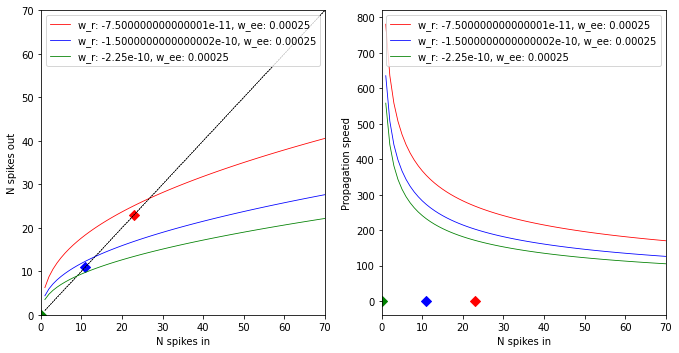

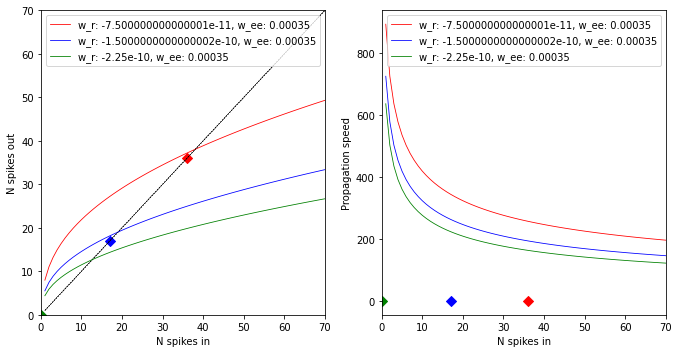

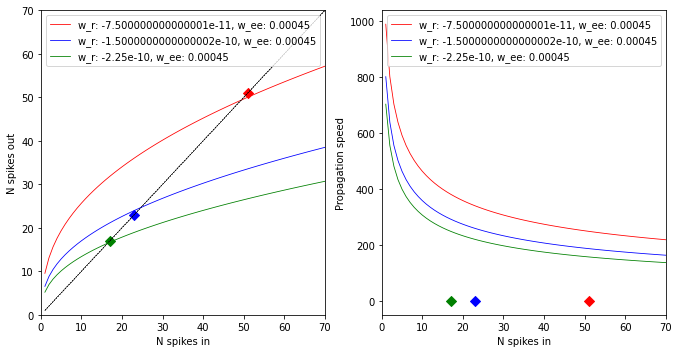

In [322]:
w_ee_vals = [0.25e-3, 0.35e-3, 0.45e-3]
w_ei_vals = np.array([0.25e-5, 0.5e-5, 0.75e-5]) * w_ie

for i, w_ee in enumerate(w_ee_vals):
    make_graph(w_ei_vals, w_ee, stable_spike_nums[i], bound=70)